# Tutorial on k-space properties

In [1]:
import numpy as np
import im_rec

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 6]
matplotlib.rcParams['figure.dpi'] = 80

In this tutorial you can explore some of the properties of k-space. In the lecture we discussed that the field-of-view ($FOV$) and the resolution ($\Delta x$) of the image is determined by:

\begin{equation}
FOV = \frac{1}{\Delta k} \quad\quad\text{and}\quad\quad \Delta x = \frac{1}{2k_{max}} \quad\text{.}
\end{equation}

#### Resolution
The image resolution is determined by the highest sampled k-space frequency ($k_{max}$). In the first exercise, we will create a low- and high-pass filter and apply it to the k-space data. After image reconstruction we will then examine the image features which were preserved and suppressed, respectively by these filters.

#### FOV
The field-of-view is determined by the distance between neighbouring k-space points ($\Delta k$). We will increase $\Delta k$ by applying a so-called undersampling mask to the k-space data. The undersampling mask sets certain k-space lines to 0, therefore increasing $\Delta k$.

Create phantom image $I$

In [2]:
im = im_rec.phantom()

Visualise phantom image

<IPython.core.display.Javascript object>


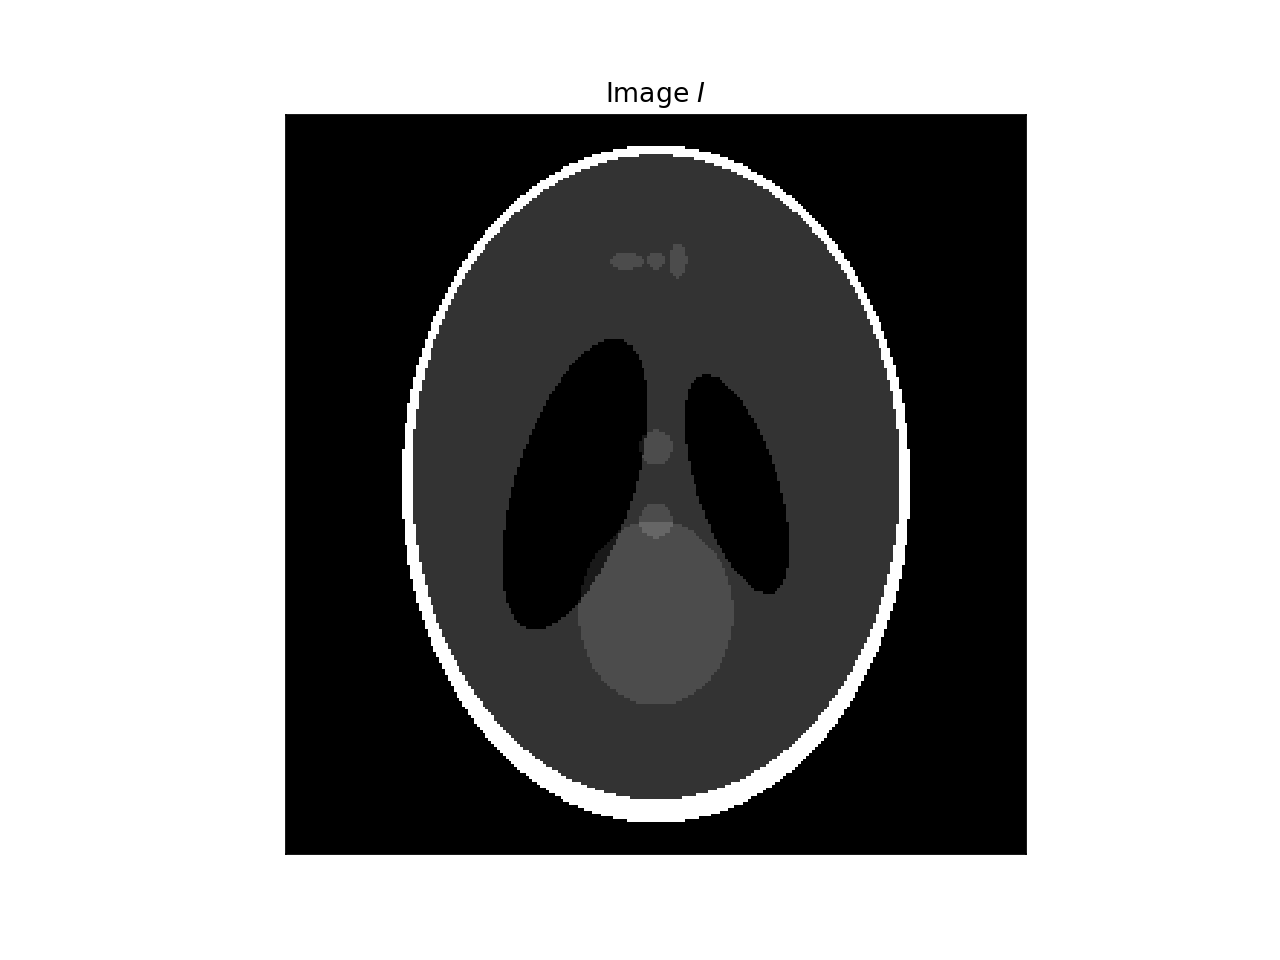

In [3]:
f, ax = plt.subplots(1)
plt.setp(ax, xticks=[], yticks=[])
ax.imshow(im, cmap='gist_gray')
ax.set_title('Image $I$');

Create and visualise low-pass filter

<IPython.core.display.Javascript object>


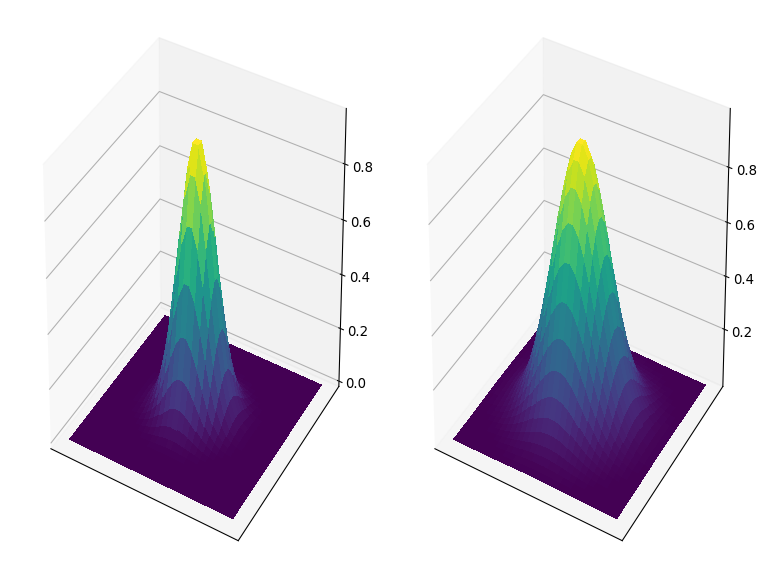

In [11]:
gauss_filt02 = im_rec.gauss_filt((32, 32), 0.2)
gauss_filt03 = im_rec.gauss_filt((32, 32), 0.3)

gridx, gridy = np.meshgrid(np.linspace(-1, 1, gauss_filt02.shape[0]), np.linspace(-1, 1, gauss_filt02.shape[1]))

plt.figure()
ax = plt.axes([0,0,0.5,1], projection='3d')
plt.setp(ax, xticks=[], yticks=[])
ax.plot_surface(gridx, gridy, gauss_filt02, rstride=1, cstride=1, cmap='viridis', antialiased=False)

ax = plt.axes([0.5,0,0.5,1], projection='3d')
plt.setp(ax, xticks=[], yticks=[])
ax.plot_surface(gridx, gridy, gauss_filt03, rstride=1, cstride=1, cmap='viridis', antialiased=False);

Transform MR image to k-space, apply low/high-pass filter and transform back to image space yielding $I_{lowpass}$ and $I_{highpass}$

In [5]:
kdat = im_rec.i2k(im)

kdat_lowpass = np.multiply(kdat, im_rec.gauss_filt(kdat.shape, 0.1))
im_lowpass = np.absolute(im_rec.k2i(kdat_lowpass))

kdat_highpass = np.multiply(kdat, 1 - im_rec.gauss_filt(kdat.shape, 0.2))
im_highpass = np.absolute(im_rec.k2i(kdat_highpass))

Visualise results

<IPython.core.display.Javascript object>


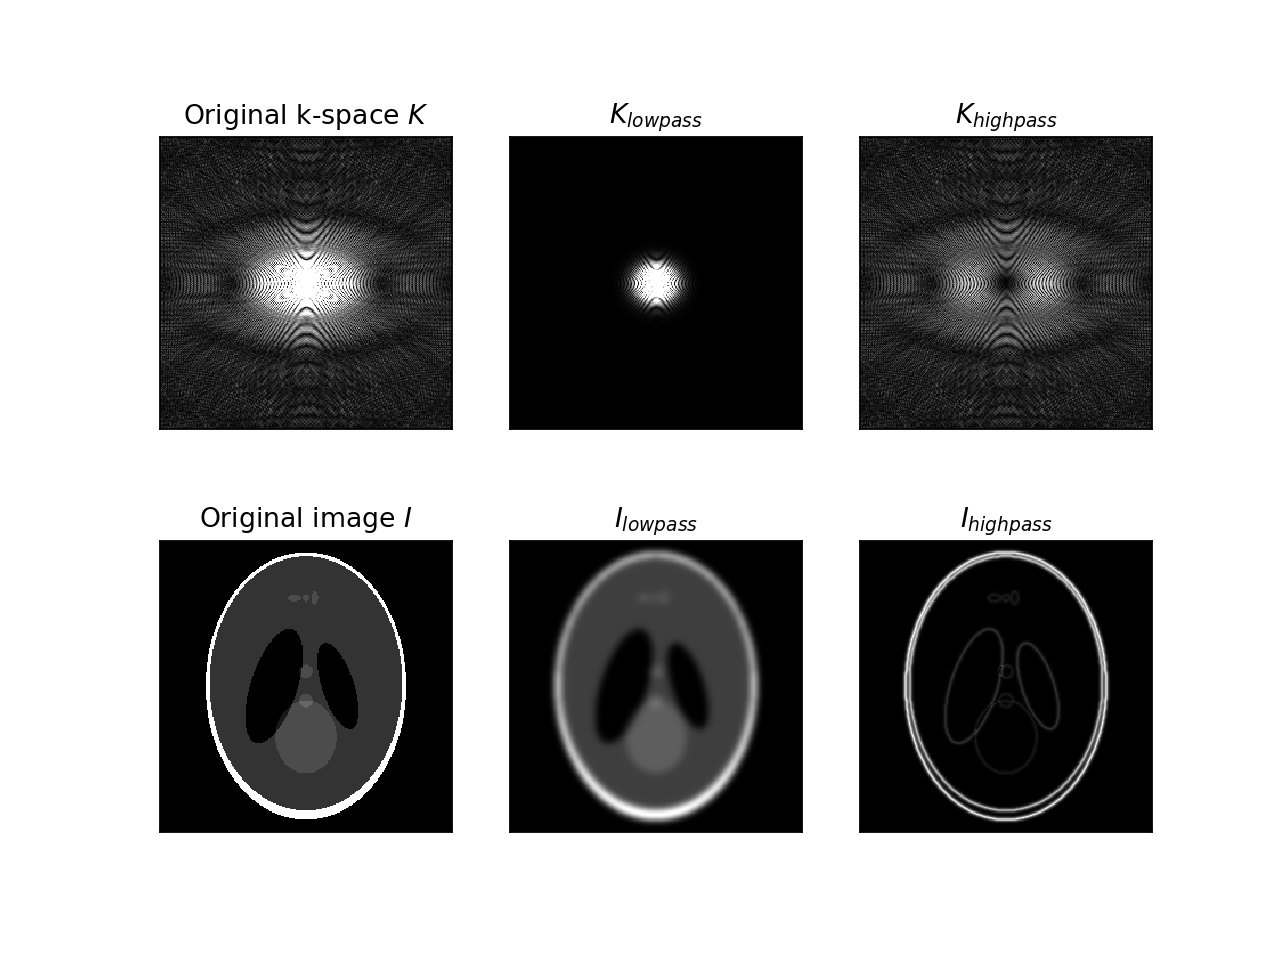

In [6]:
fig, ax = plt.subplots(2, 3)
plt.setp(ax, xticks=[], yticks=[])

ax[0,0].imshow(np.abs(kdat), cmap='gist_gray', vmin=0, vmax=100)
ax[0,0].set_title('Original k-space $K$')

ax[0,1].imshow(np.abs(kdat_lowpass), cmap='gist_gray', vmin=0, vmax=100)
ax[0,1].set_title('$K_{lowpass}$')

ax[0,2].imshow(np.abs(kdat_highpass), cmap='gist_gray', vmin=0, vmax=100)
ax[0,2].set_title('$K_{highpass}$')

ax[1,0].imshow(im, cmap='gist_gray')
ax[1,0].set_title('Original image $I$')

ax[1,1].imshow(im_lowpass, cmap='gist_gray')
ax[1,1].set_title('$I_{lowpass}$')

ax[1,2].imshow(im_highpass, cmap='gist_gray')
ax[1,2].set_title('$I_{highpass}$');

Create and visualise undersampling patterns

<IPython.core.display.Javascript object>


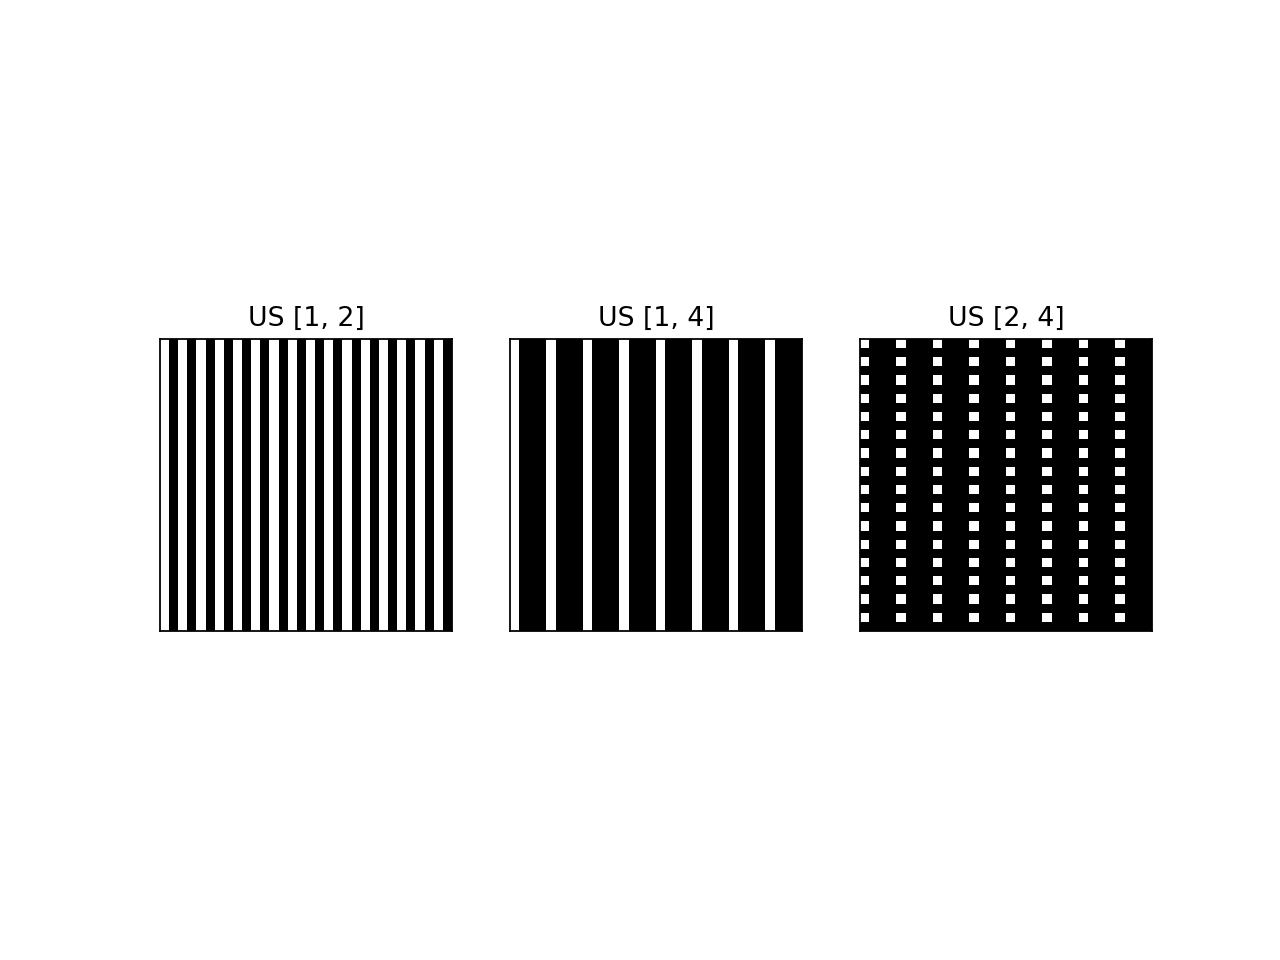

In [7]:
f, ax = plt.subplots(1, 3)
plt.setp(ax, xticks=[], yticks=[])

ax[0].imshow(im_rec.create_us_mask((32, 32), (1, 2)), cmap='gist_gray')
ax[0].set_title('US [1, 2]')

ax[1].imshow(im_rec.create_us_mask((32, 32), (1, 4)), cmap='gist_gray')
ax[1].set_title('US [1, 4]')
             
ax[2].imshow(im_rec.create_us_mask((32, 32), (2, 4)), cmap='gist_gray')
ax[2].set_title('US [2, 4]');

Apply undersampling patterns $US_2$ and $US_4$ to create k-space data with $\Delta k = 2$ and $\Delta k = 4$

In [8]:
kdat_dk2 = np.multiply(kdat, im_rec.create_us_mask(kdat.shape, (1, 2)))
kdat_dk4 = np.multiply(kdat, im_rec.create_us_mask(kdat.shape, (1, 4)))

Reconstruct images with $\Delta k = 2$ and $\Delta k = 4$.

In [9]:
im_dk2 = np.absolute(im_rec.k2i(kdat_dk2))
im_dk4 = np.absolute(im_rec.k2i(kdat_dk4))

<IPython.core.display.Javascript object>


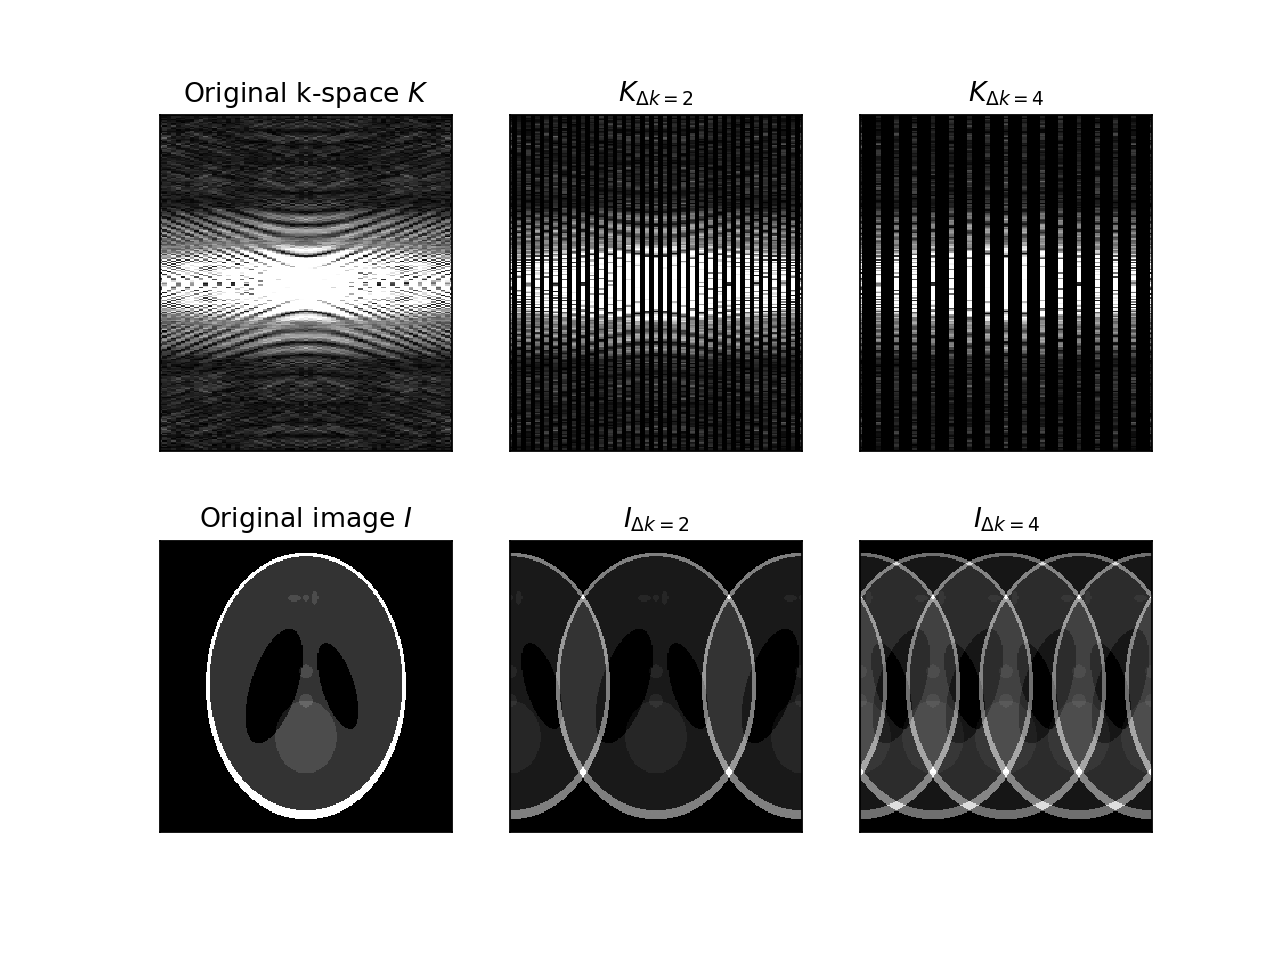

In [10]:
fig, ax = plt.subplots(2, 3)
plt.setp(ax, xticks=[], yticks=[])

ax[0,0].imshow(np.abs(kdat), cmap='gist_gray', vmin=0, vmax=100, aspect='auto')
ax[0,0].set_xlim([128-32, 128+32])
ax[0,0].set_title('Original k-space $K$')

ax[0,1].imshow(np.abs(kdat_dk2), cmap='gist_gray', vmin=0, vmax=100, aspect='auto')
ax[0,1].set_xlim([128-32, 128+32])
ax[0,1].set_title('$K_{\Delta k = 2}$')

ax[0,2].imshow(np.abs(kdat_dk4), cmap='gist_gray', vmin=0, vmax=100, aspect='auto')
ax[0,2].set_xlim([128-32, 128+32])
ax[0,2].set_title('$K_{\Delta k = 4}$')

ax[1,0].imshow(im, cmap='gist_gray')
ax[1,0].set_title('Original image $I$')

ax[1,1].imshow(im_dk2, cmap='gist_gray')
ax[1,1].set_title('$I_{\Delta k = 2}$')

ax[1,2].imshow(im_dk4, cmap='gist_gray')
ax[1,2].set_title('$I_{\Delta k = 4}$');